In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('data/train.csv').drop(['row_id'], axis=1)
df_test = pd.read_csv('data/test.csv').drop(['row_id'], axis=1)

In [59]:
df_test

,time,x,y,direction
0,1991-09-30 12:00:00,0,0,EB
1,1991-09-30 12:00:00,0,0,NB
2,1991-09-30 12:00:00,0,0,SB
3,1991-09-30 12:00:00,0,1,EB
4,1991-09-30 12:00:00,0,1,NB
...,...,...,...,...
2335,1991-09-30 23:40:00,2,3,NB
2336,1991-09-30 23:40:00,2,3,NE
2337,1991-09-30 23:40:00,2,3,SB
2338,1991-09-30 23:40:00,2,3,SW


In [60]:
df_train

,time,x,y,direction,congestion
0,1991-04-01 00:00:00,0,0,EB,70
1,1991-04-01 00:00:00,0,0,NB,49
2,1991-04-01 00:00:00,0,0,SB,24
3,1991-04-01 00:00:00,0,1,EB,18
4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...
848830,1991-09-30 11:40:00,2,3,NB,54
848831,1991-09-30 11:40:00,2,3,NE,28
848832,1991-09-30 11:40:00,2,3,SB,68
848833,1991-09-30 11:40:00,2,3,SW,17


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time        848835 non-null  object
 1   x           848835 non-null  int64 
 2   y           848835 non-null  int64 
 3   direction   848835 non-null  object
 4   congestion  848835 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 32.4+ MB


In [62]:
df_train.columns

Index(['time', 'x', 'y', 'direction', 'congestion'], dtype='object')

In [63]:
route_train = df_train['x'].astype(str) + df_train['y'].astype(str) + df_train['direction']
df_train.insert(2, 'route', route_train )
route_test = df_test['x'].astype(str) + df_test['y'].astype(str) + df_test['direction']
df_test.insert(2, 'route', route_test )

In [64]:
df_train['route'].value_counts()

00NB    13059
10WB    13059
03NE    13059
22WB    13059
13SW    13059
        ...  
23WB    13059
02EB    13059
20EB    13059
10NB    13059
10SW    13059
Name: route, Length: 65, dtype: int64

<AxesSubplot:>

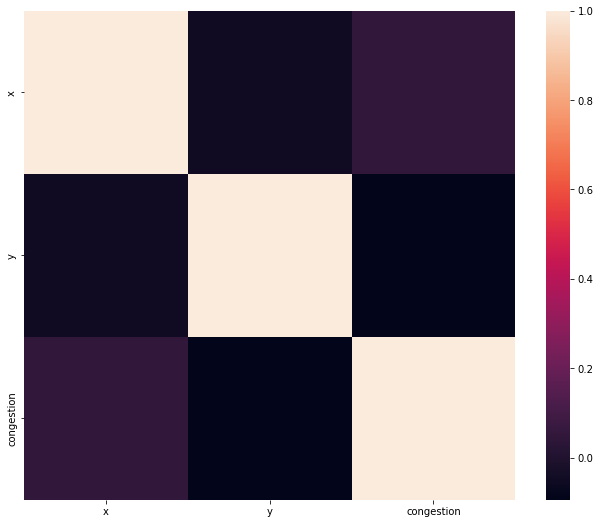

In [65]:
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(df_train.corr())